## Group Members: Yuxin (Annabel Du), Eva Slunjski, Samuel Rubidge, Xitaaz Rampersad

### Question 1 - Pick an asset universe that is representative of the broad multi-asset universe, includingdifferent asset classes and geographic regions. Get data since 2010, of at least monthly frequency, and calculate monthly returns. You do not need to go crazy - you should have at least 10 assets, but you don’t need to go off and get 50, although it will likely be easier to obtain and interpret more robust results if you have more assets

What each ticker stands for in our asset universe:

SP500: Standard & Poor’s 500 Index (the flagship US large-cap equity benchmark)

NDX: Nasdaq 100 Index (the 100 largest non-financial companies listed on Nasdaq)

DJI: Dow Jones Industrial Average (30 major US blue-chip stocks)

EWJ: iShares MSCI Japan ETF (tracks the MSCI Japan equity index)

EEM: iShares MSCI Emerging Markets ETF (tracks the MSCI Emerging Markets index)

EFA: iShares MSCI EAFE ETF (tracks the MSCI Europe, Australasia & Far East ex-US index)

GLD: SPDR Gold Shares (physically backed gold-holding ETF)

USO: United States Oil Fund LP (futures-based WTI crude oil fund)

IEF: iShares 7–10 Year Treasury ETF (US government bonds with 7–10 year maturities)

HYG: iShares iBoxx $ High Yield Corporate Bond ETF (US high-yield corporate bonds)

VNQ: Vanguard Real Estate ETF (US real estate investment trusts)

SPTSX: S&P/TSX Composite Index (Canada’s broad-market equity benchmark)

SXXP: STOXX Europe 600 Index (600 large, mid and small-cap companies across 17 European countries)

ASX: FTSE All-Share Index (the broad UK equity market index)

UUP: Invesco DB US Dollar Index Bullish Fund (tracks the ICE US Dollar Index)

FXE: Invesco CurrencyShares Euro Trust (tracks the euro against the US dollar)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Load the CSV file into a DataFrame
df = pd.read_csv('HW3_Macro_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df.sort_values(by='Date', inplace=True, ascending=True)

df1 = df.drop(columns=['CPI', 'FDFD'])

# Display the first few rows
print(df1.head())

              SP500      NDX       DJI    EWJ      EEM    EFA      GLD  \
Date                                                                     
2010-01-29  1073.87  1741.04  10067.33  39.36  38.2800  52.48  105.960   
2010-02-26  1104.49  1818.68  10325.26  39.76  38.9600  52.62  109.430   
2010-03-31  1169.43  1958.34  10856.63  41.76  42.1225  55.98  108.950   
2010-04-30  1186.69  2000.63  11008.61  41.56  42.0500  54.41  115.360   
2010-05-31  1089.41  1852.39  10136.63  38.04  38.1000  48.32  118.881   

                USO     IEF    HYG    VNQ     SPTSX    SXXP      ASX    UUP  \
Date                                                                          
2010-01-29  285.120  90.700  86.23  42.27  11094.31  246.96  2660.49  23.45   
2010-02-26  310.560  90.695  87.17  44.63  11629.63  245.80  2736.80  23.64   
2010-03-31  322.320  89.500  88.37  48.81  12037.73  263.57  2910.19  23.80   
2010-04-30  330.640  90.720  89.40  52.30  12210.70  259.91  2863.35  23.96   
2010-05

## Question 2 - Standardize the asset price return data you are using such that doing analysis on thisuniverse will make sense and results will be comparable across assets. Normalizing by volatility (so you are looking at everything in standard deviation terms), is a reasonable approach.

               SP500       NDX       DJI       EWJ       EEM       EFA  \
Date                                                                     
2024-12-31 -0.687841  0.146943 -0.973845 -1.140561 -0.757860 -1.442473   
2025-01-31  0.728582  0.839651  0.812267  0.485132  0.826676  1.050142   
2025-02-28 -0.374771 -0.825741 -0.271083  0.085225  0.420108  0.742620   
2025-03-31 -1.649308 -1.772698 -0.938728  0.055985  0.462844  0.046695   
2025-04-30 -0.219627  0.331946 -0.795041  2.211319  0.166919  1.877052   

                 GLD       USO       IEF       HYG       VNQ     SPTSX  \
Date                                                                     
2024-12-31 -0.344297  1.009989 -1.182957 -1.084960 -1.514284 -0.877569   
2025-01-31  1.451744  0.976520  0.268556  0.826418  0.276986  0.786206   
2025-02-28  0.418064 -0.835342  1.103189  0.363124  0.584754 -0.127896   
2025-03-31  1.937420  0.718247  0.023645 -1.010948 -0.617317 -0.644289   
2025-04-30  1.709160 -1.811638  0.701

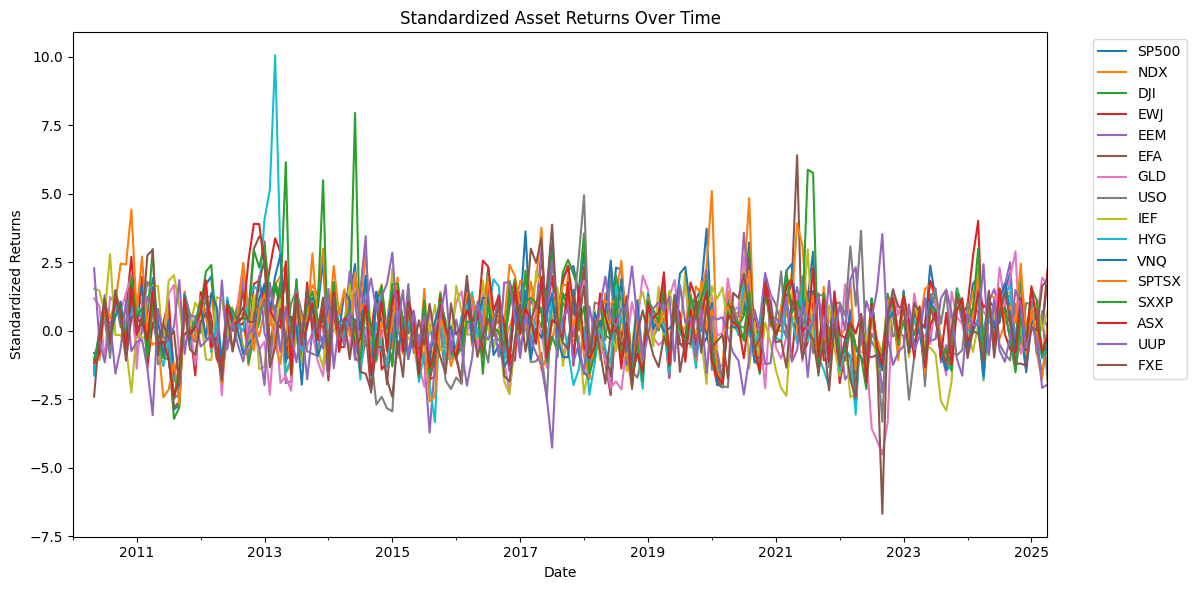

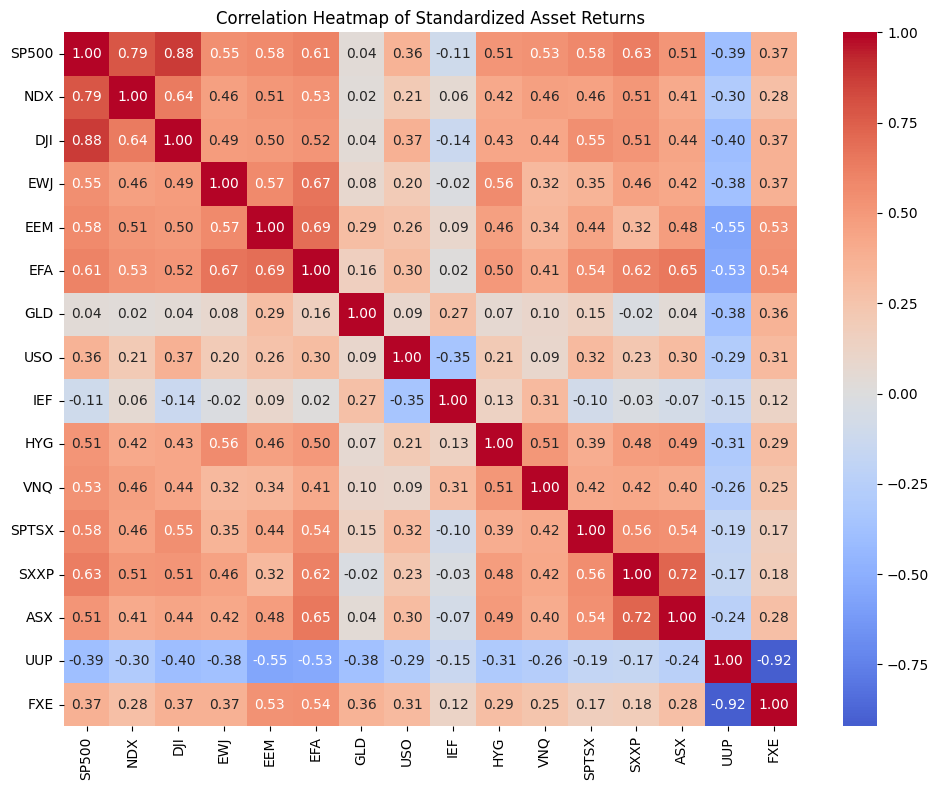

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load the uploaded CSV
standardized_returns = df


# Calculate percentage returns

returns = standardized_returns.pct_change()

# Standardize by 3-month rolling volatility (standard deviation)
standardized_returns = returns / returns.rolling(window=4).std()


standardized_returns = standardized_returns.drop(columns=['CPI', 'FDFD'])


print(standardized_returns.tail(5))

#PLOT 1

standardized_returns.plot(figsize=(12, 6), title="Standardized Asset Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Standardized Returns")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()



###PLOT 2


correlation_matrix = standardized_returns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Standardized Asset Returns")
plt.tight_layout()
plt.show()

## Question 3 - Pick 2-3 macro data series you think are relevant for the pricing of this universe. They should be available since 2010 and of monthly frequency. Why do you think these are relevant for the asset prices you have chosen?

We chose CPI (Consumer Price Index) and FDFD (Fed Funds Rate)

In [3]:
df2 = df
df2 = df2.drop(columns=[x for x in df2.columns if x not in ['CPI', 'FDFD']])

df2

,CPI,FDFD
Date,,
2010-01-29,2.6,0.12
2010-02-26,2.1,0.12
2010-03-31,2.3,0.14
2010-04-30,2.2,0.20
2010-05-31,2.0,0.18
...,...,...
2024-12-31,2.9,4.32
2025-01-31,3.0,4.31
2025-02-28,2.8,4.31


## Question 4 - From 2010-2024, empirically verify if the macro data series are relevant for the asset price series. You can do this via linear regression, as discussed in class, or via some other method. Explain and justify your approach.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

df3 = df

# 1. Select features and scale them
scaler = StandardScaler()
X_raw = df3[['CPI', 'FDFD']]
X_scaled = scaler.fit_transform(X_raw)

results = []

# 2. Loop over each column as the dependent variable
for col in df3.columns:
    if col in ['CPI', 'FDFD']:
        continue  # skip the regressors themselves
    y = df3[col]
    
    # 3. Fit the model using scaled X
    model = LinearRegression()
    model.fit(X_scaled, y)

    # 4. Extract betas and R^2
    beta_cpi, beta_fdfd = model.coef_
    r2 = model.score(X_scaled, y)
    
    results.append({
        'variable': col,
        'beta_CPI':     beta_cpi,
        'beta_FDFD':    beta_fdfd,
        'R²':    r2
    })

# 5. Build and print the summary DataFrame
results_df = pd.DataFrame(results).set_index('variable')
print(results_df)


             beta_CPI    beta_FDFD        R²
variable                                    
SP500      400.043577   860.402565  0.621487
NDX       1640.593987  3488.516466  0.600921
DJI       2914.459963  6084.893378  0.629299
EWJ          1.756908     5.356460  0.378597
EEM          1.333752    -0.895900  0.084578
EFA          1.690908     4.268699  0.340560
GLD          8.139553    19.646953  0.401763
USO        -12.886155   -41.550591  0.219282
IEF         -0.114199    -3.989423  0.273360
HYG         -1.569457    -3.897426  0.640494
VNQ          5.111503     3.094471  0.229099
SPTSX     1258.359826  2197.630428  0.647553
SXXP        17.026718    49.899069  0.535164
ASX         95.103321   315.602444  0.489766
UUP          0.369997     1.729826  0.614771
FXE         -2.255335    -7.693924  0.395432


## Question 5 - Should your estimation sample period be different? Why or why not? If it should be different, adjust it and do your analysis on the altered sample.

We have altered our estimation sample period to feature a pre-COVID and post-COVID split to show how the markets have changed after the unprecedented event.

In [11]:
splits = {
    'PreCOVID' : ('2010-01-01','2020-03-11'),
    'PostCOVID': ('2020-03-11','2024-12-31')
}

all_results = []

for name, (start, end) in splits.items():
    d = df.loc[f'{start}':f'{end}']
    macros = d[['CPI','FDFD']]
    X = pd.DataFrame(scaler.transform(macros), index=macros.index, columns=macros.columns)

    for asset in d.columns.difference(['CPI','FDFD']):
        y = d[asset].dropna()
        Xi = X.loc[y.index]
        model = LinearRegression().fit(Xi, y)
        all_results.append({
            'TimePeriod': name,
            'Asset': asset,
            'β_CPI': model.coef_[0],
            'β_FedFunds': model.coef_[1],
            'R²': model.score(Xi, y)
        })

split_df = pd.DataFrame(all_results).set_index(['TimePeriod','Asset']).round(4)
print(split_df)




before = results_df["R²"].mean().round(4)
print("Before Average R²:")
print(before)


after = split_df["R²"].mean().round(4)
print("After Average R²:")
print(after)

                      β_CPI  β_FedFunds      R²
TimePeriod Asset                               
PreCOVID   ASX    -256.4655    760.5502  0.5179
           DJI   -2253.3199  10809.0247  0.7716
           EEM       3.5761      1.4285  0.2023
           EFA      -2.4101      7.2295  0.2579
           EWJ      -3.5508     12.7245  0.5833
           FXE      14.6611    -19.5270  0.5621
           GLD      22.2037    -10.7147  0.3022
           HYG       1.1929     -4.0358  0.2342
           IEF      -4.3935      3.8514  0.1778
           NDX    -871.6117   4037.9878  0.7772
           SP500  -336.8398   1192.9115  0.7160
           SPTSX  -569.5688   2682.7910  0.5236
           SXXP    -54.0425     82.3014  0.5303
           USO      87.2659   -158.5891  0.5535
           UUP      -1.7887      2.8123  0.5639
           VNQ     -11.0522     18.1402  0.4566
PostCOVID  ASX     124.6801    183.6257  0.5884
           DJI     664.0635   2160.1262  0.3980
           EEM      -0.2667     -2.4746 

## Question 6 - Using out of sample forecasting over the period since the start of this year, indicate which assets have led or lagged what is suggested by the macro factors based on your previously estimated relationships, and to what degree (i.e., is the amount of leading or lagging meaningful in magnitude/economic terms and/or in statistical terms).

Significantly Leading/Lagging Assets (2025):
       Avg_Residual  Std_Deviation   T_Stat  P_Value
SPTSX     5709.9301        16.6384  94.8311   0.0000
SXXP        91.3333         7.1571  16.6065   0.0005
SP500     1658.3262         6.9599  19.7823   0.0003
NDX       7014.1201         6.6834  18.2613   0.0004
EEM          3.2060         6.6037   8.9504   0.0029
ASX        478.5156         6.4185  15.9417   0.0005
DJI       9724.4815         5.5234  15.4213   0.0006
EWJ          7.9270         5.3015   9.1556   0.0028
GLD        104.6022         4.9110   9.1506   0.0028
EFA         10.6404         4.7106   8.4036   0.0035
VNQ          7.2100         3.1380   7.4723   0.0050
IEF         -3.1036        -2.3367  -4.7491   0.0177


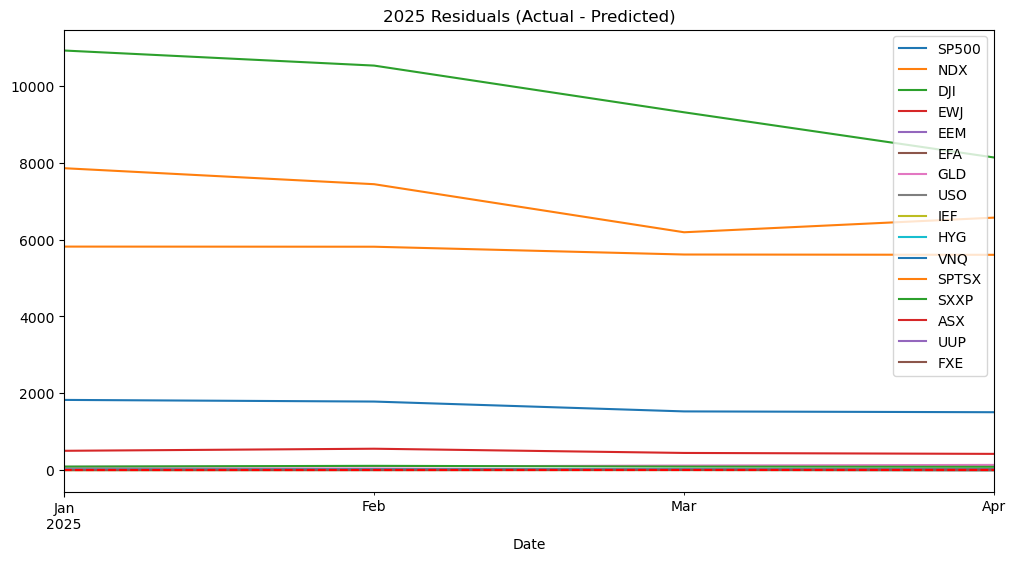

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data (assuming 'df' is your DataFrame from earlier questions)
# Ensure 'df' has columns: CPI, FDFD, and asset returns up to Apr 2025
df = pd.read_csv('HW3_Macro_Data.csv', parse_dates=['Date'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', inplace=True, ascending=True)

# Filter 2025 data for out-of-sample testing
oos_data = df.loc['2025-01-01':'2025-04-30']  # Out-of-sample period
macros_oos = oos_data[['CPI', 'FDFD']]        # Macro factors for 2025
returns_oos = oos_data.drop(columns=['CPI', 'FDFD'])  # Asset returns for 2025

# --- STEP 1: Fit Macro Model (Using Full Sample 2010-2024) ---
train_data = df.loc['2010-01-01':'2024-12-31']  # Training period
X_train = train_data[['CPI', 'FDFD']]
y_train = train_data.drop(columns=['CPI', 'FDFD'])

# Scale macro variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit linear regression for each asset
models = {}
for asset in y_train.columns:
    model = LinearRegression()
    model.fit(X_train_scaled, y_train[asset])
    models[asset] = model  # Store model coefficients

# --- STEP 2: Predict 2025 Returns ---
# Scale 2025 macro data using the same scaler
X_oos_scaled = scaler.transform(macros_oos)

# Generate predictions for each asset
predictions = pd.DataFrame(index=oos_data.index)
for asset, model in models.items():
    predictions[asset] = model.predict(X_oos_scaled)

# --- STEP 3: Compare Actual vs. Predicted ---
# Calculate residuals (Actual - Predicted)
residuals = returns_oos - predictions

# --- STEP 4: Evaluate Significance ---
# Economic Magnitude (Deviation in Std. Dev. terms)
std_devs = residuals / returns_oos.std()  # Normalize by historical volatility

# Statistical Significance (T-tests)
from scipy import stats
t_stats = {}
p_values = {}
for asset in residuals.columns:
    t_stat, p_val = stats.ttest_1samp(residuals[asset], 0)  # Test if mean residual ≠ 0
    t_stats[asset] = t_stat
    p_values[asset] = p_val

# --- STEP 5: Summarize Results ---
results = pd.DataFrame({
    'Avg_Residual': residuals.mean(),
    'Std_Deviation': std_devs.mean(),  # Avg. deviation in volatility units
    'T_Stat': t_stats,
    'P_Value': p_values
})

# Filter significant deviations (|T| > 2 or P < 0.05)
significant_assets = results[(np.abs(results['T_Stat']) > 2) | (results['P_Value'] < 0.05)]
significant_assets = significant_assets.sort_values('Std_Deviation', ascending=False)

print("Significantly Leading/Lagging Assets (2025):")
print(significant_assets.round(4))

residuals.plot(figsize=(12, 6), title="2025 Residuals (Actual - Predicted)")
plt.axhline(0, color='red', linestyle='--')
plt.show()